Objective:

The objective of this experiment is to train and evaluate a Convolutional Neural Network (CNN) using the Keras library to classify images from the Fashion MNIST dataset. The experiment also aims to analyze the effect of various hyperparameters—such as filter size, regularization strength, batch size, and optimization algorithm—on the performance of the CNN model.

Model Description:

The model used in this experiment is a Convolutional Neural Network (CNN), which is highly effective for image classification tasks. The CNN is built using the Keras Sequential API and trained on the Fashion MNIST dataset, which consists of 28×28 grayscale images across 10 fashion categories.

The experiment uses a function-based approach (create_model) to dynamically create models with different:

Filter sizes (3×3, 5×5)

Model Architecture:

Here’s a breakdown of the CNN architecture:

Input Layer
Shape: (28, 28, 1) — represents grayscale 28×28 pixel images

Normalized pixel values in the range [0, 1]

Convolution + Pooling Layers
Conv2D Layer 1:

32 filters of size (filter_size × filter_size)

Activation: ReLU

L2 Regularization applied

MaxPooling2D Layer 1:

Pool size: (2, 2)

Conv2D Layer 2:

64 filters of the same filter_size

Activation: ReLU

No regularization

MaxPooling2D Layer 2:

Pool size: (2, 2)

Flatten Layer
Converts 2D features into 1D for dense layers

Dense Layers
Dense Layer 1:

128 units

Activation: ReLU

L2 Regularization applied

Dense Layer 2 (Output):

10 units (for 10 classes)

Activation: Softmax

Weights and Biases:


Weights are initialized automatically (usually with Glorot/Xavier initializer)

Biases initialized to zeros

Regularization discourages large weight values to reduce overfitting

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
def create_model(filter_size=3, regularization=0.001, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', kernel_regularizer=regularizers.l2(regularization), input_shape=(28, 28, 1)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(regularization)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
filter_sizes = [3, 5]
regularization_values = [0.001, 0.01]
batch_sizes = [32, 64]
optimizers = ['adam', 'sgd']

In [9]:
results = {}
for filter_size in filter_sizes:
    for reg in regularization_values:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                print(f"Training model with filter_size={filter_size}, reg={reg}, batch_size={batch_size}, optimizer={optimizer}")
                model = create_model(filter_size, reg, optimizer)
                history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                results[(filter_size, reg, batch_size, optimizer)] = (history, test_acc)

Training model with filter_size=3, reg=0.001, batch_size=32, optimizer=adam


c:\Users\sharm\anaconda3\envs\nnproject\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with filter_size=3, reg=0.001, batch_size=32, optimizer=sgd
Training model with filter_size=3, reg=0.001, batch_size=64, optimizer=adam
Training model with filter_size=3, reg=0.001, batch_size=64, optimizer=sgd
Training model with filter_size=3, reg=0.01, batch_size=32, optimizer=adam
Training model with filter_size=3, reg=0.01, batch_size=32, optimizer=sgd
Training model with filter_size=3, reg=0.01, batch_size=64, optimizer=adam
Training model with filter_size=3, reg=0.01, batch_size=64, optimizer=sgd
Training model with filter_size=5, reg=0.001, batch_size=32, optimizer=adam
Training model with filter_size=5, reg=0.001, batch_size=32, optimizer=sgd
Training model with filter_size=5, reg=0.001, batch_size=64, optimizer=adam
Training model with filter_size=5, reg=0.001, batch_size=64, optimizer=sgd
Training model with filter_size=5, reg=0.01, batch_size=32, optimizer=adam
Training model with filter_size=5, reg=0.01, batch_size=32, optimizer=sgd
Training model with filte

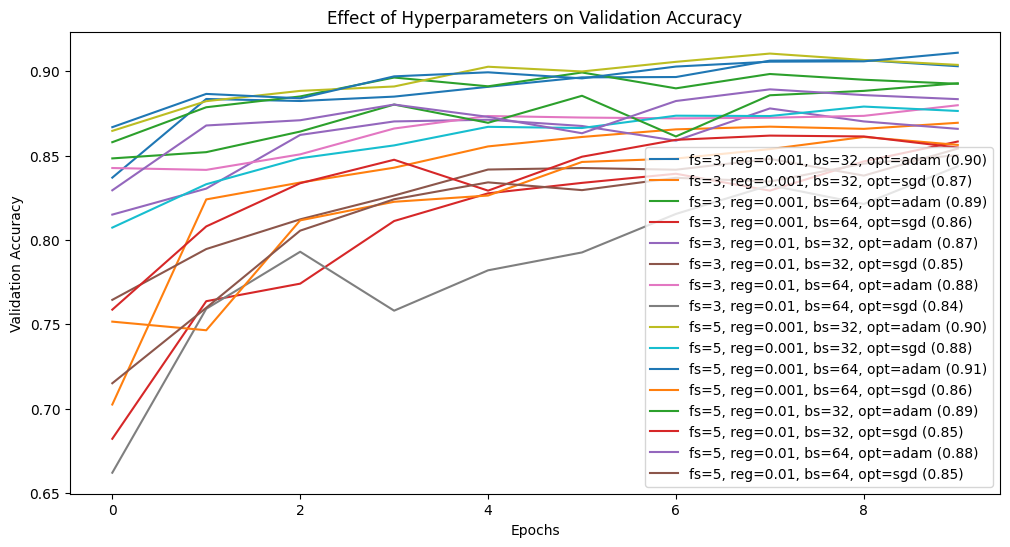

In [10]:
plt.figure(figsize=(12, 6))
for key, (history, acc) in results.items():
    filter_size, reg, batch_size, optimizer = key
    plt.plot(history.history['val_accuracy'], label=f'fs={filter_size}, reg={reg}, bs={batch_size}, opt={optimizer} ({acc:.2f})')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Effect of Hyperparameters on Validation Accuracy')
plt.show()

Performance Evaluation:
The model is trained using combinations of hyperparameters.

Each model is trained for 10 epochs.

Evaluation metrics:

Validation Accuracy per epoch

Final Test Accuracy on unseen test data

The results are stored and plotted to visually compare how different combinations affect the model's performance.

The final plot shows validation accuracy over epochs for each combination of filter size, regularization, batch size, and optimizer, making it easy to observe performance trends.



My Comments:
Well-Designed Experiment: The setup covers essential CNN tuning aspects and gives a clear picture of how each parameter impacts learning.

Comprehensive Comparison: Using nested loops to test different configurations is effective for hyperparameter search.

Performance Tracking: Storing accuracy and plotting it is an excellent way to analyze trends.

Suggestions for Improvement:

Include training accuracy/loss plots to observe overfitting.

Try more filter sizes (e.g., 1, 7) and regularization values for broader coverage.

Consider trying more optimizers like RMSprop or Adagrad.

Use callbacks like EarlyStopping to prevent unnecessary training epochs.

Include confusion matrix and classification report for deeper evaluation.